# Mission Dotlas 🌎 (40 points)

![Dotlas](https://camo.githubusercontent.com/6a3a3a9e55ce6b5c4305badbdc68c0d5f11b360b11e3fa7b93c822d637166090/68747470733a2f2f646f746c61732d776562736974652e73332e65752d776573742d312e616d617a6f6e6177732e636f6d2f696d616765732f6769746875622f62616e6e65722e706e67)

### 1.1 Overview ✉️

Welcome to your mission! In this notebook, you will download a dataset containing restaurants' information in the state of California, US. The dataset will then be transformed, processed and prepared in a required format. This clean dataset will then be used to answer some analytical questions and create a few data visualizations in Python.

This is a template notebook that has some code already filled-in to help you on your way. There are also cells that require you to fill in the python code to solve specific problems. There are sections of the notebook that contain a points tally for code written. 

**Each section of this notebook is largely independent, so if you get stuck on a problem you can always move on to the next one.**

### 1.2 Tools & Technologies 🪛

- This exercise will be carried out using the [Python](https://www.python.org/) programming language and will rely hevily on the [Pandas](https://pandas.pydata.org/) library for data manipulation.
- You may use any of [Matplotlib](https://matplotlib.org/), [Seaborn](https://seaborn.pydata.org/) or [Plotly](https://plotly.com/python/) packages for data visualization.
- We will be using [Jupyter notebooks](https://jupyter.org/) to run Python code in order to view and interact better with our data and visualizations.
- You are free to use [Google Colab](https://colab.research.google.com/) which provides an easy-to-use Jupyter interface.
- When not in Colab, it is recommended to run this Jupyter Notebook within an [Anaconda](https://continuum.io/) environment
- You can use any other Python packages that you deem fit for this project.

> ⚠ **Ensure that your Python version is 3.9 or higher**

![](https://upload.wikimedia.org/wikipedia/commons/1/1b/Blue_Python_3.9_Shield_Badge.svg)

**Language**

![Python](https://img.shields.io/badge/python-3670A0?style=for-the-badge&logo=python&logoColor=ffdd54)

**Environments & Packages**

![Anaconda](https://img.shields.io/badge/Anaconda-%2344A833.svg?style=for-the-badge&logo=anaconda&logoColor=white)
![Jupyter Notebook](https://img.shields.io/badge/jupyter-%23FA0F00.svg?style=for-the-badge&logo=jupyter&logoColor=white)
![Pandas](https://img.shields.io/badge/pandas-%23150458.svg?style=for-the-badge&logo=pandas&logoColor=white)
![Matplotlib](https://img.shields.io/badge/Matplotlib-%23ffffff.svg?style=for-the-badge&logo=Matplotlib&logoColor=black)
![Plotly](https://img.shields.io/badge/Plotly-%233F4F75.svg?style=for-the-badge&logo=plotly&logoColor=white)

**Data Store**

![AWS](https://img.shields.io/badge/AWS-%23FF9900.svg?style=for-the-badge&logo=amazon-aws&logoColor=white)

---

### 2.1 Read California Restaurants 🔍 (3 points)

In this section, we will load the dataset from [AWS](https://googlethatforyou.com?q=amazon%20web%20services), conduct an exploratory data analysis and then clean up the dataset


- Ensure that pandas and plotly are installed (possibly via pip or poetry)
- The dataset is about 300 MB in size and time-to-download depends on internet speed and availability
- Download the dataset using Python into this notebook and load it into a pandas dataframe (without writing to file)


In [1]:
from matplotlib import pyplot as plt
%matplotlib inline

import pandas as pd
import plotly.express as px
import numpy as np

CELL_HEIGHT: int = 50

# Initialize helpers to ignore pandas warnings and resize columns and cells
pd.set_option("chained_assignment", None)
pd.set_option("display.max_rows", 50)
pd.set_option("display.max_columns", 500)
pd.set_option('display.max_colwidth', CELL_HEIGHT)

DATA_URL: str = "https://dotlas-marketing.s3.amazonaws.com/interviews/california_restaurants.json"

In [2]:
%%time
df = pd.read_json(DATA_URL)

CPU times: total: 12.8 s
Wall time: 2min 11s


Create a restaurant ID column to uniquely index each restaurant


In [3]:
df["restaurant_id"] = range(1, len(df) + 1)
df.head(2)

country   subregion          city           brand_name  categories  \
0  United States  California   Los Angeles  Luv2Eat Thai Bistro      [Thai]   
1  United States  California  Sherman Oaks  Jerry's Famous Deli  [American]   

    latitude   longitude          area  \
0  34.097510 -118.335921     Hollywood   
1  34.154596 -118.448700  Sherman Oaks   

                                             address  \
0  6660 W Sunset Blvd, Ste P, CA, Los Angeles, 90...   
1                                               None   

                                                menu  \
0  [{'name': 'Main Menu', 'sections': [{'name': '...   
1  [{'name': 'Sample Menu', 'sections': [{'name':...   

                                         description public_transit  \
0  Luv2Eat Thai Bistro is located in Los Angeles,...           None   
1  <p>Feast on delicious grub at Jerry's Famous D...           None   

  cross_street                restaurant_website    phone_number  \
0         None       http://www.luv2eatthai.com/  (323) 498-5835   
1         None  http://www.jerrysfamousdeli.com/  (818) 905-5774   

  primary_cuisine   dining_style executive_chef_name    parking_info  \
0            Thai  Casual Dining                None  Street Parking   
1        American  Casual Dining                None            None   

        dress_code entertainment  \
0     Casual Dress          None   
1  Business Casual          None   

                                     operating_hours  price_range_id  \
0  Lunch\nDaily 11:00 am–3:30 pm\nDinner\nDaily 4...               2   
1                                               None               2   

     price_range                     payment_options  \
0  $30 and under  [AMEX, Discover, MasterCard, Visa]   
1  $30 and under                                  []   

   maximum_days_advance_for_reservation  rating  rating_count  \
0                                    90     4.6           136   
1                                    90     0.0             0   

                                   rating_by_feature rating_distribution  \
0  {'food': 4.7, 'noise': 2.0, 'value': 4.6, 'ser...  [2, 3, 4, 23, 104]   
1  {'food': 0.0, 'noise': 0.0, 'value': 0.0, 'ser...     [0, 0, 0, 0, 0]   

   review_count                      review_topics awards experiences  \
0            18  [Spicy, Casual, Neighborhood Gem]     []          []   
1             0                                 []     []          []   

                                                tags editorial_lists  \
0  [Delivery, Gluten-free Options, Late Night, No...              []   
1                                                 []              []   

                                           checklist  \
0  {'bar': False, 'counter': False, 'gifting': No...   
1  {'bar': None, 'counter': None, 'gifting': None...   

                                  safety_precautions order_online_link  \
0  {'cleanMenus': None, 'limitedSeating': None, '...              None   
1  {'cleanMenus': None, 'limitedSeating': None, '...              None   

                                     facebook  \
0  http://www.facebook.com/luv2eatthaibistro/   
1                                        None   

                                    menu_url popular_dishes  \
0  http://sappclub.com/restaurant.aspx?r=205             []   
1                                       None             []   

   daily_reservation_count  restaurant_id  
0                      NaN              1  
1                      NaN              2

### 2.2 Basic Operations 🔧 (4 points)

#### 2.2.1 Restaurants by City 🌆 (1 point)

For each city in california, find

1. the number of restaurants in that city,
2. mean `rating` of all restaurants in the city,
3. mean `price_range_id` per city,
4. mean `maximum_days_advance_for_reservation` per city

sort by number of restaurants.

The resulting dataframe's top 5 rows would look as follows:

| city          | restaurant_count | avg_rating | avg_price_range_id | avg_reservation_advance |
| :------------ | ---------------: | ---------: | -----------------: | ----------------------: |
| San Francisco |             1645 |    2.59343 |             2.3617 |                 90.3453 |
| Los Angeles   |             1604 |    2.31995 |            2.29052 |                  86.692 |
| San Diego     |             1034 |    2.65493 |            2.28723 |                 94.5783 |
| San Jose      |              372 |    1.54597 |            2.16398 |                 88.3011 |
| Sacramento    |              329 |    1.68663 |            2.26748 |                 95.0274 |


In [4]:
# ✏️ YOUR CODE HERE

#Grouping by Cities
city_grp = df.groupby(['city'])
#Creating a list of Cities
City = list(city_grp['city'].unique())
#restaurant count    
Rest_count = list(city_grp.size())
#average rating
avg_ratin = list(city_grp['rating'].mean())
#average price range id
avg_price_range = list(city_grp['price_range_id'].mean())
#average reservation advance
avg_reser = list(city_grp['maximum_days_advance_for_reservation'].mean())

#Converting into a dictionary
data = {'city': City, 'restaurant_count': Rest_count, 'avg_rating': avg_ratin, 'avg_price_range_id': avg_price_range, 'avg_reservation_advance': avg_reser}
#Converting into a DataFrame                
df_city_grp = pd.DataFrame(data)
#Sorting values by No of Restaurants                 
df_city_grp = df_city_grp.sort_values(by = 'restaurant_count', ascending = False, kind= 'mergesort')
#resetting index
df_city_grp.reset_index(drop=True, inplace=True)
#Checking the first 5 rows
df_city_grp.head()
                 



city  restaurant_count  avg_rating  avg_price_range_id  \
0  [San Francisco]              1645    2.593435            2.361702   
1    [Los Angeles]              1604    2.319950            2.290524   
2      [San Diego]              1034    2.654932            2.287234   
3       [San Jose]               372    1.545968            2.163978   
4     [Sacramento]               329    1.686626            2.267477   

   avg_reservation_advance  
0                90.345289  
1                86.692020  
2                94.578337  
3                88.301075  
4                95.027356

#### 2.2.2 Restaurants by Brand 🍔 (1 point)

For each brand (`brand_name`) in california, find

1. the number of restaurants that belong to that brand,
2. mean `price_range_id` of the brand across its restaurants

sort by number of restaurants.

The resulting dataframe's top 5 rows would look as follows:

| brand_name               | restaurant_count | avg_price_range_id |
| :----------------------- | ---------------: | -----------------: |
| Denny's                  |               73 |                  2 |
| Ihop                     |               37 |                  2 |
| Buffalo Wild Wings       |               32 |                  2 |
| Black Bear Diner         |               28 |                  2 |
| Coco's Bakery Restaurant |               24 |                  2 |


In [5]:
# ✏️ YOUR CODE HERE

#Grouping by brand name
brand_grp = df.groupby(['brand_name'])
#Creating a list of unique brands
brand_name = brand_grp['brand_name'].unique()[:]
#Restaurant count    
restaurant_count = list(brand_grp.size())
#average price range id
avg_price_range_id = list(brand_grp['price_range_id'].mean())

#Creating a dictionary
data_ = {'brand_name': brand_name, 'restaurant_count': restaurant_count, 'avg_price_range_id': avg_price_range_id}

#Converting into a DataFrame                
df_brand_grp = pd.DataFrame(data_)
#Sorting values by No of Restaurants                 
df_brand_grp = df_brand_grp.sort_values(by = 'restaurant_count', ascending = False, kind= 'mergesort')
#resetting index
df_brand_grp.reset_index(drop=True, inplace=True)
#Checking the first 5 rows
df_brand_grp.head()




brand_name  restaurant_count  avg_price_range_id
0                   [Denny's]                73                 2.0
1                      [Ihop]                37                 2.0
2        [Buffalo Wild Wings]                32                 2.0
3          [Black Bear Diner]                28                 2.0
4  [Coco's Bakery Restaurant]                24                 2.0

#### 2.2.3 Visualize Brands 📊 (2 points)

Create a bar chart of top 5 brands in california by average number of reviews where each brand has at least 5 restaurants


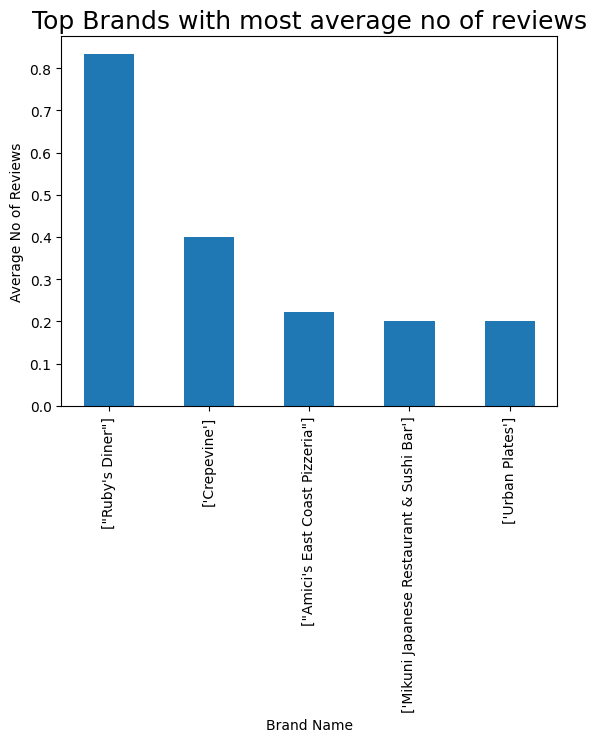

In [6]:
# ✏️ YOUR CODE HERE 
#Grouping by brand name
brand_grp = df.groupby(['brand_name'])
#Creating a list of unique brands
brand_name = brand_grp['brand_name'].unique()[:]
#Restaurant count    
restaurant_count = list(brand_grp.size())
#average_no of review
avg_review = list(brand_grp['review_count'].mean()) 

data_2 = {'brand_name': brand_name, 'restaurant_count': restaurant_count, 'avg_review': avg_review}

df_review = pd.DataFrame(data_2)
#Sorting values by No of Restaurants                 
df_review = df_review.sort_values(by = 'avg_review', ascending = False, kind= 'mergesort')
#resetting index
df_review.reset_index(drop=True, inplace=True)
#filtering brands with atleast 5 Restaurants
df_bar = df_review.loc[(df_review['restaurant_count'] >= 5)]
#Top 5 brands Dataframe
final_df = df_bar.head()
final_df.reset_index(drop=True, inplace=True)
#converting brand_name to str
final_df["brand_name"] = final_df["brand_name"].astype("str") 

#Plotting a bar chart
plt.bar(x=final_df['brand_name'], height=final_df['avg_review'], width=0.5)
plt.xticks(rotation='vertical')
plt.title('Top Brands with most average no of reviews', fontsize=18)
plt.xlabel('Brand Name')
plt.ylabel('Average No of Reviews')
plt.show()


### 2.3 Transform Columns 🚚 (15 Points)

<img src="https://media.giphy.com/media/2f41Z7bhKGvbG/giphy.gif" height="250px" width="250px" alt="harry potter">

#### 2.3.1 Safety Precautions 🦺 (2 points)

Transform the entire safety precautions column into a new column based on the following rule:

Convert from dictionary to list. Only include in the list, those keys in the dictionary which are true.
For ex, for safety precautions of the type:

```python
{
    'cleanMenus': True,
    'limitedSeating': False,
    'sealedUtensils': None,
    'prohibitSickStaff': True,
    'requireDinerMasks': True,
    'staffIsVaccinated': None,
    'proofOfVaccinationRequired': False,
    'sanitizerProvidedForCustomers': None
}
```

It should turn into a list of the form:

```python
["Clean Menus", "Prohibit Sick Staff", "Require Diner Masks"]
```


In [7]:
# ✏️ YOUR CODE HERE


def list_transform(dict1):
    list1 = []
    for key,val in sorted(dict1.items()):
        if val == True:
            list1.append(key)
    return list1

df['safety_precautions'] = df['safety_precautions'].apply(list_transform)   


#### 2.3.2 Clean up HTML text 🥜 (2 points)

Find columns containing text / strings that have html text and remove those HTML texts

ex:

```html
<p>
  Feast on delicious grub at Jerry's Famous Deli.<br />
  Its retro-style casual setting features comfortable booth seating.
</p>
```

to:

```
Feast on delicious grub at Jerry's Famous Deli. Its retro-style casual setting features comfortable booth seating.
```


In [8]:
# ✏️ YOUR CODE HERE

import re
from bs4 import BeautifulSoup

In [9]:
CLEANR = re.compile('<.*?>')
def cleanhtml(raw_html):
  cleantext = re.sub(CLEANR, '', raw_html)
  return cleantext

In [10]:
cols_with_html=[]
for column in df.columns:
    df[column]=df[column].apply(str)
    for value in df[column].values:
        #print(value)
        if bool(BeautifulSoup(value, "html.parser").find()) == True:
            cols_with_html.append(column)

C:\Users\mohit\anaconda3\envs\mission_dotlas\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
C:\Users\mohit\anaconda3\envs\mission_dotlas\lib\site-packages\bs4\__init__.py:404: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(


In [11]:
list_set = set(cols_with_html)
unique_list = (list(list_set))
print(unique_list)

for column in unique_list:
    #print(df[column])
    df[column] = df[column].apply(cleanhtml)

['entertainment', 'public_transit', 'experiences', 'description', 'cross_street']


#### 2.3.3 Imputing 📈 (3 points)

Fill up missing values for rating, rating count and review count by imputing based on the following columns in order:

1. `brand_name`
2. `area`
3. `city`

This means that if `rating` is missing for a restaurant (null / 0), but that restaurant is part of a brand where
other restaurants of the same brand have ratings, then a median rating is taken. If brands are complete, then missing values are filled using
area where the restaurant is located (median rating) and finally filled using the city's rating


In [12]:
print(df['review_count'].isnull().sum())

0


In [13]:
print(df['rating'].isnull().sum())

0


In [14]:
print(df['rating_count'].isnull().sum())

0


In [15]:
#convert to float
df['rating'] = df['rating'].astype('float')
df['rating_count'] = df['rating_count'].astype('float')
df['review_count'] = df['review_count'].astype('float')

count = (df['rating'] == 0).sum()
print(count)

9258


In [16]:
df['rating'].head()

0    4.6
1    0.0
2    0.0
3    0.0
4    4.7
Name: rating1, dtype: float64

In [17]:
#Grouping Medians of different groups

df['imputed_rating_brandname'] =df.groupby(["brand_name"])['rating'].median().reset_index(drop=True,
level=0)
df['imputed_rating_area'] =df.groupby(["area"])['rating'].median().reset_index(drop=True,
level=0)
df['imputed_rating_city'] =df.groupby(["city"])['rating'].median().reset_index(drop=True,
level=0)


In [18]:
df['imputed_rating_count_brandname'] =df.groupby(["brand_name"])['rating_count'].median().reset_index(drop=True,
level=0)
df['imputed_rating_count_area'] =df.groupby(["area"])['rating_count'].median().reset_index(drop=True,
level=0)
df['imputed_rating_count_city'] =df.groupby(["city"])['rating_count'].median().reset_index(drop=True,
level=0)


In [19]:
df['imputed_review_count_brandname'] =df.groupby(["brand_name"])['review_count'].median().reset_index(drop=True,
level=0)
df['imputed_review_count_area'] =df.groupby(["area"])['review_count'].median().reset_index(drop=True,
level=0)
df['imputed_review_count_city'] =df.groupby(["city"])['review_count'].median().reset_index(drop=True,
level=0)


In [20]:
df[["rating1","imputed_rating_brandname","imputed_rating_area","imputed_rating_city"]]

rating1  imputed_rating_brandname  imputed_rating_area  \
0          4.6                       0.0                  4.3   
1          0.0                       4.7                  4.5   
2          0.0                       3.9                  3.2   
3          0.0                       4.5                  0.0   
4          4.7                       4.7                  3.7   
...        ...                       ...                  ...   
18311      0.0                       NaN                  NaN   
18312      0.0                       NaN                  NaN   
18313      3.9                       NaN                  NaN   
18314      4.5                       NaN                  NaN   
18315      0.0                       NaN                  NaN   

       imputed_rating_city  
0                      0.0  
1                      0.0  
2                      1.9  
3                      0.0  
4                      4.1  
...                    ...  
18311                  NaN  
18312                  NaN  
18313                  NaN  
18314                  NaN  
18315                  NaN  

[18316 rows x 4 columns]

In [21]:
df['rating'] = np.where(df['rating'] == 0,df['imputed_rating_brandname'], df['rating'])

In [22]:
count = (df['rating'] == 0).sum()
print(count)

4312


In [23]:
df['rating'] = np.where(df['rating'] == 0,df['imputed_rating_area'], df['rating'])

In [24]:
count = (df['rating'] == 0).sum()
print(count)

157


In [25]:
df['rating'] = np.where(df['rating'] == 0,df['imputed_rating_city'], df['rating'])

In [26]:
count = (df['rating'] == 0).sum()
print(count)

222


In [27]:
df['rating_count'] = np.where(df['rating_count'] == 0,df['imputed_rating_count_brandname'], df['rating_count'])

In [28]:
count4 = (df['rating_count'] == 0).sum()
print(count4)

4312


In [29]:
df['rating_count'] = np.where(df['rating_count'] == 0,df['imputed_rating_count_area'], df['rating_count'])

In [30]:
count4 = (df['rating_count'] == 0).sum()
print(count4)

157


In [31]:
df['rating_count'] = np.where(df['rating_count'] == 0,df['imputed_rating_count_city'], df['rating_count'])

In [32]:
count4 = (df['rating_count'] == 0).sum()
print(count4)

222


In [33]:
df['review_count'] = np.where(df['review_count'] == 0,df['imputed_review_count_brandname'], df['review_count'])

In [34]:
count5 = (df['review_count'] == 0).sum()
print(count5)

4490


In [35]:
df['review_count'] = np.where(df['review_count'] == 0,df['imputed_review_count_area'], df['review_count'])

In [36]:
count5 = (df['review_count'] == 0).sum()
print(count5)

164


In [37]:
df['review_count'] = np.where(df['review_count'] == 0,df['imputed_review_count_city'], df['review_count'])

In [38]:
count5 = (df['review_count'] == 0).sum()
print(count5)

230


In [39]:
count1 = (df['rating'] == 0).sum()
print(count1)
count2 = (df['rating_count'] == 0).sum()
print(count2)
count3 = (df['review_count'] == 0).sum()
print(count3)



222
222
230


Without specific instructions on imputing values if all 3 conditions are not satisfied, I left the remaining null values as it is.

#### 2.3.4 Analytical Transformations (8 points)

Choose any one sub-section only to answer. The choice is yours

<img src="https://media.giphy.com/media/SCt3Miv6ugvSg/giphy.gif" height="250px" width="250px" alt="the matrix">


##### 2.3.4a Operating Hours 🕰️

Create an operating hours [bitmap](https://en.wikipedia.org/wiki/Bit_array) column from the operating hours text column for all restaurants. The bitmap would be a matrix of size 24 x 7 where a 1 or 0 on each cell indicates whether the restaurant is operating on a specific day at a specific hour

Example: For operating hours text of the form:

```tex
Lunch
Daily 11:00 am–3:30 pm
Dinner
Daily 4:30 pm–11:30 pm
```

Create a bitmap of the following form:

```json
{
    "Monday" : [0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,1,1,1,1,1,1,1],
    "Tuesday" : [0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,1,1,1,1,1,1,1],
    .
    .
    .
    "Sunday" : [0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,1,1,1,1,1,1,1],

}
```


In [40]:
# ✏️ YOUR CODE HERE

##### 2.3.4b On my radar 🗺️

For the following restaurant:

- brand_name `Calzone's Pizza Cucina`
- coordinates `37.799068, -122.408226`.

Answer these questions:

- How many restaurants exist within a 100 meter radius of this restaurant?
- What is the most frequent cuisine (`category`) occurence in this 100m radius across the restaurants that exist in that range?

In [41]:
# ✏️ YOUR CODE HERE
import geopy.distance
def calculate_distance(latitude,longitude):
    coords_calzones_pizza = (37.799068, -122.408226)
    coords_2 = (latitude, longitude)
    return geopy.distance.geodesic(coords_calzones_pizza, coords_2).meters

In [42]:
#How many restaurants exist within a 100-meter radius of this restaurant?

df['distance_from_calzone'] = df.apply(lambda row:calculate_distance(row.latitude,row.longitude), axis=1)
df[["latitude","longitude","distance_from_calzone"]]


latitude    longitude  distance_from_calzone
0       34.09751  -118.335921          550945.852399
1      34.154596    -118.4487          539376.240861
2        34.1458    -118.1429          558719.638808
3        34.1378    -118.1323          560033.891926
4      34.174018  -118.317323          545664.745033
...          ...          ...                    ...
18311   33.74347   -118.10331          594836.493722
18312   37.68936   -120.97609          126808.373863
18313   37.78565  -122.399734            1666.574298
18314   37.86861  -122.503054           11369.386317
18315   34.05427   -118.35499          553456.903922

[18316 rows x 3 columns]

In [43]:
df_restaurants_near_calzone=df.query('distance_from_calzone <= 100')
df_restaurants_near_calzone

country   subregion           city  \
879    United States  California  San Francisco   
1370   United States  California  San Francisco   
1492   United States  California  San Francisco   
1971   United States  California  San Francisco   
3843   United States  California  San Francisco   
4576   United States  California  San Francisco   
4811   United States  California  San Francisco   
5624   United States  California  San Francisco   
6280   United States  California  San Francisco   
7532   United States  California  San Francisco   
8563   United States  California  San Francisco   
8971   United States  California  San Francisco   
9519   United States  California  San Francisco   
9539   United States  California  San Francisco   
11408  United States  California  San Francisco   
12323  United States  California  San Francisco   
13355  United States  California  San Francisco   
14308  United States  California  San Francisco   
16490  United States  California  San Francisco   
16752  United States  California  San Francisco   
18047  United States  California  San Francisco   

                                              brand_name  \
879                                        Caffe Puccini   
1370                      Vicoletto - Permanently Closed   
1492                              Yarsa Nepalese Cuisine   
1971                              Mona Lisa Mare e Monti   
3843                                 Baonecci Ristorante   
4576                                              Ideale   
4811                   California Fish Market Restaurant   
5624                         Eight Tables by George Chen   
6280                                      Mos Restaurant   
7532   Pinocchio Sicilian Trattoria - Permanently Closed   
8563                      Panta Rei - Permanently Closed   
8971   Original U.S. Restaurant Unione Sportiva - Per...   
9519                              Calzone's Pizza Cucina   
9539                         Caffe Sport - San Francisco   
11408                                     Dip Restaurant   
12323        Capo's Chicago Pizza & Fine Italian Dinners   
13355                                  The Stinking Rose   
14308                    Sodinis Green Valley Restaurant   
16490                              Molinari Delicatessen   
16752                                   Barbara Pinseria   
18047                                      Caffe Trieste   

                                              categories    latitude  \
879                                         ['American']    37.79911   
1370                                         ['Italian']   37.799797   
1492                     ['Nepalese', 'Asian', 'Indian']   37.799032   
1971                     ['Italian', 'Seafood', 'Steak']  37.7990195   
3843                             ['Italian', 'Pizzeria']   37.799768   
4576   ['Italian', 'Pizzeria', 'Bar / Lounge / Bottle...   37.798969   
4811                                         ['Italian']    37.79959   
5624     ['Chinese', 'Californian', 'Fusion / Eclectic']   37.798342   
6280                                         ['Burgers']    37.79905   
7532                    ['Italian', 'Steak', 'Pizzeria']   37.798761   
8563                                         ['Italian']   37.799148   
8971                                         ['Italian']   37.799105   
9519                ['Italian', 'Contemporary American']   37.799068   
9539                             ['Italian', 'European']   37.799676   
11408                                       ['American']    37.79905   
12323                            ['Italian', 'Pizzeria']   37.798515   
13355                                        ['Italian']   37.799102   
14308                                        ['Italian']    37.79967   
16490                                           ['Deli']    37.79855   
16752                            ['Pizzeria', 'Italian']   37.799047   
18047                                       ['American'] 

In [44]:
#What is the most frequent cuisine (`category`) occurrence in this 100m radius across the restaurants that exist in that range?

from ast import literal_eval
df_restaurants_near_calzone['categories'] = df_restaurants_near_calzone['categories'].apply(literal_eval)
df_categories_exploded = df_restaurants_near_calzone.explode('categories')
#display(df_categories_exploded)


In [45]:

df_categories=df_categories_exploded.groupby(['categories']).size().reset_index(name='counts')

print(df_categories[df_categories.counts == df_categories.counts.max()])


   categories  counts
11    Italian      14


Italian is the most frequent cuisine in the 100m radius

---

Remember to hydrate and 

[![Spotify](https://img.shields.io/badge/Spotify-1ED760?style=for-the-badge&logo=spotify&logoColor=white)](https://open.spotify.com/playlist/3d4bU6GAelt3YL2L1X2SOn)

---

### 2.4 Menu-Level Table 🧾 (8 points)

<img src="https://media.giphy.com/media/qpLuA97QGOsnK/giphy.gif" height="250px" width="250px" alt="ratatouille">

**Create a menu-level table by parsing out menu items from the `menu` column per restaurant.**

Every restaurant has a `menu` column that contains deeply nested JSON data on the restaurant's menu. The hierarchy is as follows: 

* One restaurant can have multiple menus (morning menu, evening menu, etc.)
    * Each menu can have a description and provider
* Each restaurant menu can have multiple sections (such as Appetizers, Desserts, etc.)
    * Each section has a description
* Each section can have multiple menu items (such as Latte, Apple Pie, Carrot Halwa, etc.)
    * Each menu item has a price, currency and description

You need to parse out the menu data from the JSON in the `menu` column for each restaurant and have a restaurants x menu table as shown below. 

| restaurant_id | menu_name | menu_description | menu_provider | section_name | section_description | item_name          | item_description                                                                                                      | item_price | item_price_currency |
| ------------: | :-------- | :--------------- | ------------: | :----------- | :------------------ | :----------------- | :-------------------------------------------------------------------------------------------------------------------- | ---------: | :------------------ |
|             1 | Main Menu |                  |           nan | Appetizers   |                     | Egg Rolls          | Deep fried mixed veggie egg rolls served with sweet & sour sauce                                                      |          8 | USD                 |
|             1 | Main Menu |                  |           nan | Appetizers   |                     | Fried Tofu         | (Contains Peanut) Deep fried tofu, served with sweet & sour sauce and crushed peanut                                  |          8 | USD                 |
|             1 | Main Menu |                  |           nan | Appetizers   |                     | Fried Meat Balls   | Deep fried fish, pork, beef balls or mixed served with sweet & sour sauce. Meat: Beef $1, Fish, Mixed Meat ball, Pork |        8.5 | USD                 |
|             1 | Main Menu |                  |           nan | Appetizers   |                     | Pork Jerky         | Deep fried marinated pork served with special jaew sauce                                                              |        8.5 | USD                 |
|             1 | Main Menu |                  |           nan | Appetizers   |                     | Thai Isaan Sausage | (Contains Peanut) Thai Style sausage served with fresh vegetables and peanuts                                         |          9 | USD                 |


In [46]:
def create_dataframe_from_json_one_restaurant(restaurant_id, menu):
    dict_menu = literal_eval(menu)
    df_menu = pd.json_normalize(dict_menu, errors = 'ignore')
    #print(df_menu)
    df_menu_section = df_menu['sections'].explode().apply(pd.Series)
    #print(df_menu_section)
    df_menu_section.rename(columns={col:f'Sections.{col}' for col in df_menu_section.columns}, inplace=True)
    #print(df_menu_section)
    df_menu_section_item  = df_menu_section['Sections.items'].explode().apply(pd.Series)
    #print(df_menu_section_item)
    df_menu_section_item.rename(columns={col:f'Items.{col}' for col in df_menu_section_item.columns}, inplace=True)
    #print(df_menu_section_item)
    cols = [col for col in df_menu.columns if col not in ['Sections','Sections.items']]
    df_menu = df_menu[cols].join(df_menu_section).join(df_menu_section_item)
    #df_menu.dropna(axis=1, how='all', inplace=True)
    df_menu=df_menu.drop(['Sections.items'], axis=1)
    df_menu=pd.concat([df_menu.drop(['Items.price'], axis=1), df_menu['Items.price'].apply(pd.Series)], axis=1)
    #df_menu=df_menu.drop(['sections'], axis=1)
    df_menu["restaurant_id"]=restaurant_id
    return df_menu


In [47]:
def create_dataframe_from_json_all_restaurants():
    result_menu_df = pd.DataFrame()
    for restaurant_id,menu in zip(df.restaurant_id, df.menu):
        #print(restaurant_id,menu)
        response_data=create_dataframe_from_json_one_restaurant(restaurant_id,menu)
        result_menu_df=result_menu_df.append(response_data)

    #print(result_menu_df)
    df_final_menu = pd.DataFrame(result_menu_df)
    df_final_menu =df_final_menu[['restaurant_id','name','description','provider_name','Sections.name','Sections.description','Items.name','Items.description','value','currency_code']]
    df_final_menu.rename(columns = {'name':'menu_name','description':'menu_description','provider_name':'menu_provider',
                                    'Sections.description':'section_description','Sections.name':'section_name','Items.name':'item_name','Items.description':'item_description','value':'item_price','currency_code':'item_price_currency'}, inplace =True)
    #print(df_final_menu.head())
    print("Dataframe successfully constructed")
    return df_final_menu

In [48]:
# A borderline stupid attempt to use apply on a series to get a dataframe as an output here.
#df_menu_final = df['menu'].apply(lambda x: create_dataframe_from_json_one_restaurant(x['restaurant_id'], x['menu']))

In [50]:
df_menu_please_run=create_dataframe_from_json_all_restaurants()

df_menu_please_run.head()

C:\Users\mohit\AppData\Local\Temp\ipykernel_20816\1336935481.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_menu_df=result_menu_df.append(response_data)
C:\Users\mohit\AppData\Local\Temp\ipykernel_20816\1336935481.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_menu_df=result_menu_df.append(response_data)
C:\Users\mohit\AppData\Local\Temp\ipykernel_20816\1336935481.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_menu_df=result_menu_df.append(response_data)
C:\Users\mohit\AppData\Local\Temp\ipykernel_20816\1336935481.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_menu_df=result_menu_df.append

C:\Users\mohit\AppData\Local\Temp\ipykernel_20816\4228322265.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_menu=pd.concat([df_menu.drop(['Items.price'], axis=1), df_menu['Items.price'].apply(pd.Series)], axis=1)
C:\Users\mohit\AppData\Local\Temp\ipykernel_20816\4228322265.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_menu=pd.concat([df_menu.drop(['Items.price'], axis=1), df_menu['Items.price'].apply(pd.Series)], axis=1)
C:\Users\mohit\AppData\Local\Temp\ipykernel_20816\4228322265.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_menu=pd.concat([df_menu.drop(['Items.price'], axis=1), df_menu['Items.price'].apply(pd.S

C:\Users\mohit\AppData\Local\Temp\ipykernel_20816\4228322265.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_menu=pd.concat([df_menu.drop(['Items.price'], axis=1), df_menu['Items.price'].apply(pd.Series)], axis=1)
C:\Users\mohit\AppData\Local\Temp\ipykernel_20816\4228322265.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_menu=pd.concat([df_menu.drop(['Items.price'], axis=1), df_menu['Items.price'].apply(pd.Series)], axis=1)
C:\Users\mohit\AppData\Local\Temp\ipykernel_20816\4228322265.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_menu=pd.concat([df_menu.drop(['Items.price'], axis=1), df_menu['Items.price'].apply(pd.S

C:\Users\mohit\AppData\Local\Temp\ipykernel_20816\4228322265.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_menu=pd.concat([df_menu.drop(['Items.price'], axis=1), df_menu['Items.price'].apply(pd.Series)], axis=1)
C:\Users\mohit\AppData\Local\Temp\ipykernel_20816\4228322265.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_menu=pd.concat([df_menu.drop(['Items.price'], axis=1), df_menu['Items.price'].apply(pd.Series)], axis=1)
C:\Users\mohit\AppData\Local\Temp\ipykernel_20816\4228322265.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_menu=pd.concat([df_menu.drop(['Items.price'], axis=1), df_menu['Items.price'].apply(pd.S

C:\Users\mohit\AppData\Local\Temp\ipykernel_20816\4228322265.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_menu=pd.concat([df_menu.drop(['Items.price'], axis=1), df_menu['Items.price'].apply(pd.Series)], axis=1)
C:\Users\mohit\AppData\Local\Temp\ipykernel_20816\4228322265.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_menu=pd.concat([df_menu.drop(['Items.price'], axis=1), df_menu['Items.price'].apply(pd.Series)], axis=1)
C:\Users\mohit\AppData\Local\Temp\ipykernel_20816\4228322265.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_menu=pd.concat([df_menu.drop(['Items.price'], axis=1), df_menu['Items.price'].apply(pd.S

C:\Users\mohit\AppData\Local\Temp\ipykernel_20816\4228322265.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_menu=pd.concat([df_menu.drop(['Items.price'], axis=1), df_menu['Items.price'].apply(pd.Series)], axis=1)
C:\Users\mohit\AppData\Local\Temp\ipykernel_20816\4228322265.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_menu=pd.concat([df_menu.drop(['Items.price'], axis=1), df_menu['Items.price'].apply(pd.Series)], axis=1)
C:\Users\mohit\AppData\Local\Temp\ipykernel_20816\4228322265.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_menu=pd.concat([df_menu.drop(['Items.price'], axis=1), df_menu['Items.price'].apply(pd.S

C:\Users\mohit\AppData\Local\Temp\ipykernel_20816\4228322265.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_menu=pd.concat([df_menu.drop(['Items.price'], axis=1), df_menu['Items.price'].apply(pd.Series)], axis=1)
C:\Users\mohit\AppData\Local\Temp\ipykernel_20816\4228322265.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_menu=pd.concat([df_menu.drop(['Items.price'], axis=1), df_menu['Items.price'].apply(pd.Series)], axis=1)
C:\Users\mohit\AppData\Local\Temp\ipykernel_20816\4228322265.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_menu=pd.concat([df_menu.drop(['Items.price'], axis=1), df_menu['Items.price'].apply(pd.S

C:\Users\mohit\AppData\Local\Temp\ipykernel_20816\4228322265.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_menu=pd.concat([df_menu.drop(['Items.price'], axis=1), df_menu['Items.price'].apply(pd.Series)], axis=1)
C:\Users\mohit\AppData\Local\Temp\ipykernel_20816\4228322265.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_menu=pd.concat([df_menu.drop(['Items.price'], axis=1), df_menu['Items.price'].apply(pd.Series)], axis=1)
C:\Users\mohit\AppData\Local\Temp\ipykernel_20816\4228322265.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_menu=pd.concat([df_menu.drop(['Items.price'], axis=1), df_menu['Items.price'].apply(pd.S

C:\Users\mohit\AppData\Local\Temp\ipykernel_20816\4228322265.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_menu=pd.concat([df_menu.drop(['Items.price'], axis=1), df_menu['Items.price'].apply(pd.Series)], axis=1)
C:\Users\mohit\AppData\Local\Temp\ipykernel_20816\4228322265.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_menu=pd.concat([df_menu.drop(['Items.price'], axis=1), df_menu['Items.price'].apply(pd.Series)], axis=1)
C:\Users\mohit\AppData\Local\Temp\ipykernel_20816\4228322265.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_menu=pd.concat([df_menu.drop(['Items.price'], axis=1), df_menu['Items.price'].apply(pd.S

C:\Users\mohit\AppData\Local\Temp\ipykernel_20816\4228322265.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_menu=pd.concat([df_menu.drop(['Items.price'], axis=1), df_menu['Items.price'].apply(pd.Series)], axis=1)
C:\Users\mohit\AppData\Local\Temp\ipykernel_20816\4228322265.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_menu=pd.concat([df_menu.drop(['Items.price'], axis=1), df_menu['Items.price'].apply(pd.Series)], axis=1)
C:\Users\mohit\AppData\Local\Temp\ipykernel_20816\4228322265.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_menu=pd.concat([df_menu.drop(['Items.price'], axis=1), df_menu['Items.price'].apply(pd.S

C:\Users\mohit\AppData\Local\Temp\ipykernel_20816\4228322265.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_menu=pd.concat([df_menu.drop(['Items.price'], axis=1), df_menu['Items.price'].apply(pd.Series)], axis=1)
C:\Users\mohit\AppData\Local\Temp\ipykernel_20816\4228322265.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_menu=pd.concat([df_menu.drop(['Items.price'], axis=1), df_menu['Items.price'].apply(pd.Series)], axis=1)
C:\Users\mohit\AppData\Local\Temp\ipykernel_20816\4228322265.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_menu=pd.concat([df_menu.drop(['Items.price'], axis=1), df_menu['Items.price'].apply(pd.S

C:\Users\mohit\AppData\Local\Temp\ipykernel_20816\4228322265.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_menu=pd.concat([df_menu.drop(['Items.price'], axis=1), df_menu['Items.price'].apply(pd.Series)], axis=1)
C:\Users\mohit\AppData\Local\Temp\ipykernel_20816\4228322265.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_menu=pd.concat([df_menu.drop(['Items.price'], axis=1), df_menu['Items.price'].apply(pd.Series)], axis=1)
C:\Users\mohit\AppData\Local\Temp\ipykernel_20816\4228322265.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_menu=pd.concat([df_menu.drop(['Items.price'], axis=1), df_menu['Items.price'].apply(pd.S

C:\Users\mohit\AppData\Local\Temp\ipykernel_20816\4228322265.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_menu=pd.concat([df_menu.drop(['Items.price'], axis=1), df_menu['Items.price'].apply(pd.Series)], axis=1)
C:\Users\mohit\AppData\Local\Temp\ipykernel_20816\4228322265.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_menu=pd.concat([df_menu.drop(['Items.price'], axis=1), df_menu['Items.price'].apply(pd.Series)], axis=1)
C:\Users\mohit\AppData\Local\Temp\ipykernel_20816\4228322265.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_menu=pd.concat([df_menu.drop(['Items.price'], axis=1), df_menu['Items.price'].apply(pd.S

C:\Users\mohit\AppData\Local\Temp\ipykernel_20816\4228322265.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_menu=pd.concat([df_menu.drop(['Items.price'], axis=1), df_menu['Items.price'].apply(pd.Series)], axis=1)
C:\Users\mohit\AppData\Local\Temp\ipykernel_20816\4228322265.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_menu=pd.concat([df_menu.drop(['Items.price'], axis=1), df_menu['Items.price'].apply(pd.Series)], axis=1)
C:\Users\mohit\AppData\Local\Temp\ipykernel_20816\4228322265.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_menu=pd.concat([df_menu.drop(['Items.price'], axis=1), df_menu['Items.price'].apply(pd.S

C:\Users\mohit\AppData\Local\Temp\ipykernel_20816\4228322265.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_menu=pd.concat([df_menu.drop(['Items.price'], axis=1), df_menu['Items.price'].apply(pd.Series)], axis=1)
C:\Users\mohit\AppData\Local\Temp\ipykernel_20816\4228322265.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_menu=pd.concat([df_menu.drop(['Items.price'], axis=1), df_menu['Items.price'].apply(pd.Series)], axis=1)
C:\Users\mohit\AppData\Local\Temp\ipykernel_20816\4228322265.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_menu=pd.concat([df_menu.drop(['Items.price'], axis=1), df_menu['Items.price'].apply(pd.S

C:\Users\mohit\AppData\Local\Temp\ipykernel_20816\4228322265.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_menu=pd.concat([df_menu.drop(['Items.price'], axis=1), df_menu['Items.price'].apply(pd.Series)], axis=1)
C:\Users\mohit\AppData\Local\Temp\ipykernel_20816\4228322265.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_menu=pd.concat([df_menu.drop(['Items.price'], axis=1), df_menu['Items.price'].apply(pd.Series)], axis=1)
C:\Users\mohit\AppData\Local\Temp\ipykernel_20816\4228322265.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_menu=pd.concat([df_menu.drop(['Items.price'], axis=1), df_menu['Items.price'].apply(pd.S

C:\Users\mohit\AppData\Local\Temp\ipykernel_20816\4228322265.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_menu=pd.concat([df_menu.drop(['Items.price'], axis=1), df_menu['Items.price'].apply(pd.Series)], axis=1)
C:\Users\mohit\AppData\Local\Temp\ipykernel_20816\4228322265.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_menu=pd.concat([df_menu.drop(['Items.price'], axis=1), df_menu['Items.price'].apply(pd.Series)], axis=1)
C:\Users\mohit\AppData\Local\Temp\ipykernel_20816\4228322265.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_menu=pd.concat([df_menu.drop(['Items.price'], axis=1), df_menu['Items.price'].apply(pd.S

C:\Users\mohit\AppData\Local\Temp\ipykernel_20816\4228322265.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_menu=pd.concat([df_menu.drop(['Items.price'], axis=1), df_menu['Items.price'].apply(pd.Series)], axis=1)
C:\Users\mohit\AppData\Local\Temp\ipykernel_20816\4228322265.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_menu=pd.concat([df_menu.drop(['Items.price'], axis=1), df_menu['Items.price'].apply(pd.Series)], axis=1)
C:\Users\mohit\AppData\Local\Temp\ipykernel_20816\4228322265.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_menu=pd.concat([df_menu.drop(['Items.price'], axis=1), df_menu['Items.price'].apply(pd.S

C:\Users\mohit\AppData\Local\Temp\ipykernel_20816\4228322265.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_menu=pd.concat([df_menu.drop(['Items.price'], axis=1), df_menu['Items.price'].apply(pd.Series)], axis=1)
C:\Users\mohit\AppData\Local\Temp\ipykernel_20816\4228322265.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_menu=pd.concat([df_menu.drop(['Items.price'], axis=1), df_menu['Items.price'].apply(pd.Series)], axis=1)
C:\Users\mohit\AppData\Local\Temp\ipykernel_20816\4228322265.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_menu=pd.concat([df_menu.drop(['Items.price'], axis=1), df_menu['Items.price'].apply(pd.S

C:\Users\mohit\AppData\Local\Temp\ipykernel_20816\4228322265.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_menu=pd.concat([df_menu.drop(['Items.price'], axis=1), df_menu['Items.price'].apply(pd.Series)], axis=1)
C:\Users\mohit\AppData\Local\Temp\ipykernel_20816\4228322265.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_menu=pd.concat([df_menu.drop(['Items.price'], axis=1), df_menu['Items.price'].apply(pd.Series)], axis=1)
C:\Users\mohit\AppData\Local\Temp\ipykernel_20816\4228322265.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_menu=pd.concat([df_menu.drop(['Items.price'], axis=1), df_menu['Items.price'].apply(pd.S

C:\Users\mohit\AppData\Local\Temp\ipykernel_20816\4228322265.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_menu=pd.concat([df_menu.drop(['Items.price'], axis=1), df_menu['Items.price'].apply(pd.Series)], axis=1)
C:\Users\mohit\AppData\Local\Temp\ipykernel_20816\4228322265.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_menu=pd.concat([df_menu.drop(['Items.price'], axis=1), df_menu['Items.price'].apply(pd.Series)], axis=1)
C:\Users\mohit\AppData\Local\Temp\ipykernel_20816\4228322265.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_menu=pd.concat([df_menu.drop(['Items.price'], axis=1), df_menu['Items.price'].apply(pd.S

C:\Users\mohit\AppData\Local\Temp\ipykernel_20816\4228322265.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_menu=pd.concat([df_menu.drop(['Items.price'], axis=1), df_menu['Items.price'].apply(pd.Series)], axis=1)
C:\Users\mohit\AppData\Local\Temp\ipykernel_20816\4228322265.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_menu=pd.concat([df_menu.drop(['Items.price'], axis=1), df_menu['Items.price'].apply(pd.Series)], axis=1)
C:\Users\mohit\AppData\Local\Temp\ipykernel_20816\4228322265.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_menu=pd.concat([df_menu.drop(['Items.price'], axis=1), df_menu['Items.price'].apply(pd.S

C:\Users\mohit\AppData\Local\Temp\ipykernel_20816\4228322265.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_menu=pd.concat([df_menu.drop(['Items.price'], axis=1), df_menu['Items.price'].apply(pd.Series)], axis=1)
C:\Users\mohit\AppData\Local\Temp\ipykernel_20816\4228322265.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_menu=pd.concat([df_menu.drop(['Items.price'], axis=1), df_menu['Items.price'].apply(pd.Series)], axis=1)
C:\Users\mohit\AppData\Local\Temp\ipykernel_20816\4228322265.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_menu=pd.concat([df_menu.drop(['Items.price'], axis=1), df_menu['Items.price'].apply(pd.S

C:\Users\mohit\AppData\Local\Temp\ipykernel_20816\4228322265.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_menu=pd.concat([df_menu.drop(['Items.price'], axis=1), df_menu['Items.price'].apply(pd.Series)], axis=1)
C:\Users\mohit\AppData\Local\Temp\ipykernel_20816\4228322265.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_menu=pd.concat([df_menu.drop(['Items.price'], axis=1), df_menu['Items.price'].apply(pd.Series)], axis=1)
C:\Users\mohit\AppData\Local\Temp\ipykernel_20816\4228322265.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_menu=pd.concat([df_menu.drop(['Items.price'], axis=1), df_menu['Items.price'].apply(pd.S

C:\Users\mohit\AppData\Local\Temp\ipykernel_20816\4228322265.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_menu=pd.concat([df_menu.drop(['Items.price'], axis=1), df_menu['Items.price'].apply(pd.Series)], axis=1)
C:\Users\mohit\AppData\Local\Temp\ipykernel_20816\4228322265.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_menu=pd.concat([df_menu.drop(['Items.price'], axis=1), df_menu['Items.price'].apply(pd.Series)], axis=1)
C:\Users\mohit\AppData\Local\Temp\ipykernel_20816\4228322265.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_menu=pd.concat([df_menu.drop(['Items.price'], axis=1), df_menu['Items.price'].apply(pd.S

C:\Users\mohit\AppData\Local\Temp\ipykernel_20816\4228322265.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_menu=pd.concat([df_menu.drop(['Items.price'], axis=1), df_menu['Items.price'].apply(pd.Series)], axis=1)
C:\Users\mohit\AppData\Local\Temp\ipykernel_20816\4228322265.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_menu=pd.concat([df_menu.drop(['Items.price'], axis=1), df_menu['Items.price'].apply(pd.Series)], axis=1)
C:\Users\mohit\AppData\Local\Temp\ipykernel_20816\4228322265.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_menu=pd.concat([df_menu.drop(['Items.price'], axis=1), df_menu['Items.price'].apply(pd.S

C:\Users\mohit\AppData\Local\Temp\ipykernel_20816\4228322265.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_menu=pd.concat([df_menu.drop(['Items.price'], axis=1), df_menu['Items.price'].apply(pd.Series)], axis=1)
C:\Users\mohit\AppData\Local\Temp\ipykernel_20816\4228322265.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_menu=pd.concat([df_menu.drop(['Items.price'], axis=1), df_menu['Items.price'].apply(pd.Series)], axis=1)
C:\Users\mohit\AppData\Local\Temp\ipykernel_20816\4228322265.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_menu=pd.concat([df_menu.drop(['Items.price'], axis=1), df_menu['Items.price'].apply(pd.S

C:\Users\mohit\AppData\Local\Temp\ipykernel_20816\1336935481.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_menu_df=result_menu_df.append(response_data)
C:\Users\mohit\AppData\Local\Temp\ipykernel_20816\4228322265.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_menu=pd.concat([df_menu.drop(['Items.price'], axis=1), df_menu['Items.price'].apply(pd.Series)], axis=1)
C:\Users\mohit\AppData\Local\Temp\ipykernel_20816\4228322265.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_menu=pd.concat([df_menu.drop(['Items.price'], axis=1), df_menu['Items.price'].apply(pd.Series)], axis=1)
C:\Users\mohit\AppData\Local\Temp\ipykernel_20816\4228322265.py:17: 

C:\Users\mohit\AppData\Local\Temp\ipykernel_20816\1336935481.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_menu_df=result_menu_df.append(response_data)
C:\Users\mohit\AppData\Local\Temp\ipykernel_20816\1336935481.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_menu_df=result_menu_df.append(response_data)
C:\Users\mohit\AppData\Local\Temp\ipykernel_20816\1336935481.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_menu_df=result_menu_df.append(response_data)
C:\Users\mohit\AppData\Local\Temp\ipykernel_20816\4228322265.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_menu

C:\Users\mohit\AppData\Local\Temp\ipykernel_20816\4228322265.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_menu=pd.concat([df_menu.drop(['Items.price'], axis=1), df_menu['Items.price'].apply(pd.Series)], axis=1)
C:\Users\mohit\AppData\Local\Temp\ipykernel_20816\4228322265.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_menu=pd.concat([df_menu.drop(['Items.price'], axis=1), df_menu['Items.price'].apply(pd.Series)], axis=1)
C:\Users\mohit\AppData\Local\Temp\ipykernel_20816\4228322265.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_menu=pd.concat([df_menu.drop(['Items.price'], axis=1), df_menu['Items.price'].apply(pd.S

NotImplementedError: 

### Seems to work with a single row.

In [51]:
df['menu'].iloc[0]

"[{'name': 'Main Menu', 'sections': [{'name': 'Appetizers', 'items': [{'name': 'Egg Rolls', 'price': {'value': 8.0, 'currency_code': 'USD'}, 'description': 'Deep fried mixed veggie egg rolls served with sweet & sour sauce'}, {'name': 'Fried Tofu', 'price': {'value': 8.0, 'currency_code': 'USD'}, 'description': '(Contains Peanut) Deep fried tofu, served with sweet & sour sauce and crushed peanut'}, {'name': 'Fried Meat Balls', 'price': {'value': 8.5, 'currency_code': 'USD'}, 'description': 'Deep fried fish, pork, beef balls or mixed served with sweet & sour sauce. Meat: Beef $1, Fish, Mixed Meat ball, Pork'}, {'name': 'Pork Jerky', 'price': {'value': 8.5, 'currency_code': 'USD'}, 'description': 'Deep fried marinated pork served with special jaew sauce'}, {'name': 'Thai Isaan Sausage', 'price': {'value': 9.0, 'currency_code': 'USD'}, 'description': '(Contains Peanut) Thai Style sausage served with fresh vegetables and peanuts'}, {'name': 'Fish Cake', 'price': {'value': 9.0, 'currency_cod

In [52]:
val = "[{'name': 'Main Menu', 'sections': [{'name': 'Appetizers', 'items': [{'name': 'Egg Rolls', 'price': {'value': 8.0, 'currency_code': 'USD'}, 'description': 'Deep fried mixed veggie egg rolls served with sweet & sour sauce'}, {'name': 'Fried Tofu', 'price': {'value': 8.0, 'currency_code': 'USD'}, 'description': '(Contains Peanut) Deep fried tofu, served with sweet & sour sauce and crushed peanut'}, {'name': 'Fried Meat Balls', 'price': {'value': 8.5, 'currency_code': 'USD'}, 'description': 'Deep fried fish, pork, beef balls or mixed served with sweet & sour sauce. Meat: Beef $1, Fish, Mixed Meat ball, Pork'}, {'name': 'Pork Jerky', 'price': {'value': 8.5, 'currency_code': 'USD'}, 'description': 'Deep fried marinated pork served with special jaew sauce'}, {'name': 'Thai Isaan Sausage', 'price': {'value': 9.0, 'currency_code': 'USD'}, 'description': '(Contains Peanut) Thai Style sausage served with fresh vegetables and peanuts'}, {'name': 'Fish Cake', 'price': {'value': 9.0, 'currency_code': 'USD'}, 'description': '(Contains Peanut) Deep fried seasoning Fish paste serve with sweet & sour sauce, cucumber and peanut'}, {'name': 'Crab Roll', 'price': {'value': 10.5, 'currency_code': 'USD'}, 'description': 'Deep fried mixture of crab, pork, chicken roll in soy tofu sheet served with sweet n sour sauce'}, {'name': 'Chicken Satay', 'price': {'value': 9.5, 'currency_code': 'USD'}, 'description': '(During hour could take at least 20 mins) (Contains Peanut) Marinated chicken breast with satay seasoning, served with peanut sauce and pickled cucumber onion'}, {'name': 'Thai Northern Sausage', 'price': {'value': 11.0, 'currency_code': 'USD'}, 'description': 'Northern Thai style sausage with a kick of spices'}, {'name': 'Eggplant Green Curry & Roti', 'price': {'value': 11.0, 'currency_code': 'USD'}, 'description': 'Chinese eggplant in green curry sauce served with roti'}, {'name': 'Grilled Marinated Pork', 'price': {'value': 12.0, 'currency_code': 'USD'}, 'description': '(During hour could take at least 20 mins) Grilled Thai Style Marinated pork served with spicy lime fish sauce'}, {'name': 'Crying Tiger Beef', 'price': {'value': 13.5, 'currency_code': 'USD'}, 'description': '(During hour could take at least 20 mins) Grilled Thai style marinated beef served with spicy lime fish sauce'}, {'name': 'Grilled Pork Nam Tok', 'price': {'value': 12.5, 'currency_code': 'USD'}, 'description': '(During hour could take at least 20 mins) Grilled pork with red onion, green onion, mint, cilantro, culantro, and roasted rice powder'}, {'name': 'Grilled Beef Nam Tok', 'price': {'value': 14.0, 'currency_code': 'USD'}, 'description': '(During hour could take at least 20 mins) Grilled Beef with red onion, green onion, mint, cilantro, culantro, and roasted rice powder'}], 'description': ''}, {'name': 'Salads', 'items': [{'name': 'Thai Salad with Peanut Dressing', 'price': {'value': 9.5, 'currency_code': 'USD'}, 'description': '(Contains Peanut) Lettuce, red onion, tomatoes, cucumber, carrot, hard boiled egg. Choice of chicken or tofu or Shrimp serve with peanut dressing'}, {'name': 'Papaya Salad Tum Thai (Plain)', 'price': {'value': 10.0, 'currency_code': 'USD'}, 'description': '(Contains Peanut) Dried shrimps, lime, tamarind sauce, fish sauce, palm sugar, peanuts. Main ingredients'}, {'name': 'Papaya Salad Tum Pu | Tum Pra Ra | Tum Pu Pra Ra', 'price': {'value': 11.0, 'currency_code': 'USD'}, 'description': 'Salted crab, black crab paste, fermented fish sauce'}, {'name': 'Papaya Salad Tum Sua', 'price': {'value': 12.5, 'currency_code': 'USD'}, 'description': 'Salted crab, black crab paste, fermented fish sauce, vermicelli rice noodle'}, {'name': 'Papaya Salad Tum OMG', 'price': {'value': 20.0, 'currency_code': 'USD'}, 'description': 'Raw blue crab, raw squid, raw shrimp, salted mussel, salted crab, black crab paste, fermented fish sauce and crispy pork'}, {'name': 'Larb', 'price': {'value': 10.0, 'currency_code': 'USD'}, 'description': 'Choice of ground Chicken, Pork, Beef, or Tofu with red onion, green onion, mint, cilantro, chili flake, and roasted rice powder'}, {'name': 'Pork Liver Salad', 'price': {'value': 10.5, 'currency_code': 'USD'}, 'description': 'medium cooked pork liver with red onion, green onion, mint, cilantro, chili flake, and roasted rice powder'}, {'name': 'Glass Noodle Salad', 'price': {'value': 10.5, 'currency_code': 'USD'}, 'description': 'Glass noodles, ground pork, shrimp, red onion, green onion, cilantro, Chinese celery, and tomato with spicy lime dressing'}, {'name': 'Spicy Beef Salad', 'price': {'value': 10.5, 'currency_code': 'USD'}, 'description': 'Sliced beef, cucumber, tomato, Chinese celery, and onion with spicy lime dressing'}, {'name': 'Naked Shrimp Salad', 'price': {'value': 11.5, 'currency_code': 'USD'}, 'description': 'Fresh raw shrimps, shredded cabbage with spicy lime dressing'}], 'description': 'Any Papaya Salad in Tray Size with 11 condiments Add $7'}, {'name': 'Noodle Soup or Dry', 'items': [{'name': 'Phuket Shrimp Noodle', 'price': {'value': 14.0, 'currency_code': 'USD'}, 'description': 'Noodle with shrimp, pork wonton, chili paste, fried onion, green leaf, cilantro, green onion and bean sprouts in chicken broth. Choice: Dry Style, Soup Style. Noodle Choice: Angel Hair Noodle, Small Rice Noodle, Glass Noodle, Flat Rice Noodle, Egg Noodle, Jade Noodle $1'}, {'name': 'Moo Deng Noodle', 'price': {'value': 8.5, 'currency_code': 'USD'}, 'description': '(Contains Peanut) Noodle with pork patty, bean sprout, green bean, cilantro, dried shrimps, crushed peanut, and fried wonton in special house broth. Choice: Dry Style, Soup Style. Noodle Choice: Angel Hair Noodle, Small Rice Noodle, Glass Noodle, Flat Rice Noodle, Egg Noodle, Jade Noodle $1'}, {'name': 'Zeed Noodle Pork', 'price': {'value': 8.5, 'currency_code': 'USD'}, 'description': '(Contains Peanut) Pork - Noodles with BBQ pork, pork ball, ground pork, sliced fish stick, bean sprout, green bean peanut, cilantro, green onion in special house broth. Choice: Dry Style, Soup Style. Noodle Choice: Angel Hair Noodle, Small Rice Noodle, Glass Noodle, Flat Rice Noodle, Egg Noodle, Jade Noodle $1'}, {'name': 'Zeen Noodle Chicken', 'price': {'value': 8.5, 'currency_code': 'USD'}, 'description': '(Contains Peanuts) Chicken - Noodles with sliced chicken, ground chicken, fish balls, sliced fish stick, dried shrimps, bean sprout, green beans, crushed peanut, cilantro, green onion in special house broth. Choice: Dry Style, Soup Style. Noodle Choice: Angel Hair Noodle, Small Rice Noodle, Glass Noodle, Flat Rice Noodle, Egg Noodle, Jade Noodle $1'}, {'name': 'Zeen Noodle Chicken', 'price': {'value': 8.5, 'currency_code': 'USD'}, 'description': '(Contains Peanuts) Chicken - Noodles with sliced chicken, ground chicken, fish balls, sliced fish stick, dried shrimps, bean sprout, green beans, crushed peanut, cilantro, green onion in special house broth. Choice: Dry Style, Soup Style. Noodle Choice: Angel Hair Noodle, Small Rice Noodle, Glass Noodle, Flat Rice Noodle, Egg Noodle, Jade Noodle $1'}, {'name': 'Zeed Noodle Vegetarian', 'price': {'value': 8.5, 'currency_code': 'USD'}, 'description': '(Contains Peanuts) Vegetarian - Noodles with mixed vegetable, fried tofu, bean sprouts, green beans, peanut, cilantro, green onion in special house broth. Choice: Dry Style, Soup Style. Noodle Choice: Angel Hair Noodle, Small Rice Noodle, Glass Noodle, Flat Rice Noodle, Egg Noodle, Jade Noodle $1'}, {'name': 'Boat Noodle (Pork/Beef)', 'price': {'value': 8.5, 'currency_code': 'USD'}, 'description': 'Pork - Noodles with sliced pork, pork liver and pork ball bean sprouts, Chinese broccoli in special brown broth. Beef - Noodles with sliced beef, pork liver, tripe and beef ball bean sprouts, Chinese broccoli in special brown broth. Choice: Dry Style, Soup Style. Noodle Choice: Angel Hair Noodle, Small Rice Noodle, Glass Noodle, Flat Rice Noodle, Egg Noodle, Jade Noodle $1'}, {'name': 'Sparerib Zeed Noodles', 'price': {'value': 8.5, 'currency_code': 'USD'}, 'description': '(Contains Peanut) Noodles with pork spareribs, BBQ pork, ground pork, bean sprouts, green bean, dried shrimps, and crushed peanut in special house broth. Choice: Dry Style, Soup Style. Noodle Choice: Angel Hair Noodle, Small Rice Noodle, Glass Noodle, Flat Rice Noodle, Egg Noodle, Jade Noodle $1'}, {'name': 'Fish Ball Zeed Noodles', 'price': {'value': 8.5, 'currency_code': 'USD'}, 'description': '(Contains Peanut) Noodles with fish ball and fish stick, bean sprout, green beans, dried shrimps, and crushed peanut in special house broth. Choice: Dry Style, Soup Style. Noodle Choice: Angel Hair Noodle, Small Rice Noodle, Glass Noodle, Flat Rice Noodle, Egg Noodle, Jade Noodle $1'}, {'name': 'Meatball Noodles', 'price': {'value': 8.5, 'currency_code': 'USD'}, 'description': 'Noodles with choice of Fish, Pork, or Beef balls, bean sprout, and green leaf in clear broth. Choice: Dry Style, Soup Style. Noodle Choice: Angel Hair Noodle, Small Rice Noodle, Glass Noodle, Flat Rice Noodle, Egg Noodle, Jade Noodle $1'}, {'name': 'Braised Beef Shank Noodle', 'price': {'value': 9.0, 'currency_code': 'USD'}, 'description': 'Noodles with braised beef shank, beef balls, bean sprout, green leaf, and Chinese celery in brown broth. Choice: Dry Style, Soup Style. Noodle Choice: Angel Hair Noodle, Small Rice Noodle, Glass Noodle, Flat Rice Noodle, Egg Noodle, Jade Noodle $1'}, {'name': 'Chicken Drumstick Noodle', 'price': {'value': 11.0, 'currency_code': 'USD'}, 'description': 'Noodles with braised chicken drumstick, bean sprout, and green leaf, Chinese broccoli in special brown broth. Choice: Dry Style, Soup Style. Noodle Choice: Angel Hair Noodle, Small Rice Noodle, Glass Noodle, Flat Rice Noodle, Egg Noodle, Jade Noodle $1'}, {'name': 'Roasted Duck Noodle', 'price': {'value': 12.0, 'currency_code': 'USD'}, 'description': 'Noodles with roasted duck, bean sprout, green leaf and Chinese broccoli in special brown broth. Choice: Dry Style, Soup Style. Noodle Choice: Angel Hair Noodle, Small Rice Noodle, Glass Noodle, Flat Rice Noodle, Egg Noodle, Jade Noodle $1'}, {'name': 'Yen Ta Fo (Pink Noodle Soup)', 'price': {'value': 11.0, 'currency_code': 'USD'}, 'description': 'Noodle with shrimps, squid, fish balls, slice fish stick, white jelly mushroom, tofu, fried wonton, ong choy in fermanted soybean pink soup. Choice: Dry Style, Soup Style. Noodle Choice: Angel Hair Noodle, Small Rice Noodle, Glass Noodle, Flat Rice Noodle, Egg Noodle, Jade Noodle $1'}, {'name': 'Seafood Zeed Noodle', 'price': {'value': 14.5, 'currency_code': 'USD'}, 'description': '(Contains Peanut) Noodles with mussel, fish balls, shrimp, fish, squid, and fish stick, white jelly mushroom, bean sprout, green beans, green leaf, dried shrimps. Choice: Dry Style, Soup Style. Noodle Choice: Angel Hair Noodle, Small Rice Noodle, Glass Noodle, Flat Rice Noodle, Egg Noodle, Jade Noodle $1'}, {'name': 'Ba Mee Giaw Char Siu Pork', 'price': {'value': 11.0, 'currency_code': 'USD'}, 'description': '(Contains Peanut) Egg noodles with pork wonton, BBQ pork, bean sprout and green leaf, cilantro, green onion, in chicken broth. Choice: Dry Style, Soup Style'}, {'name': 'Jade Noodle with 3 BBQ', 'price': {'value': 12.5, 'currency_code': 'USD'}, 'description': '(Contains Peanut) Jade noodles with BBQ pork, crispy pork, roasted duck, bean sprouts, green leaf, Chinese broccoli, and crushed peanut. Choice: Dry Style, Soup Style'}, {'name': 'Pork Wonton', 'price': {'value': 11.0, 'currency_code': 'USD'}, 'description': 'Pork wontons, fish ball, sliced fish stick, bean sprouts, green leaf, cilantro, green onion in chicken broth'}, {'name': 'Shrimp Wonton', 'price': {'value': 12.5, 'currency_code': 'USD'}, 'description': 'Shrimp wontons, fish ball, sliced fish stick, bean sprouts, green leaf, cilantro, green onion in chicken broth'}, {'name': 'Pork Wonton Zeed', 'price': {'value': 12.5, 'currency_code': 'USD'}, 'description': '(Contains Peanut) Pork wontons with ground pork, BBQ pork, fish balls, and fish stick, bean sprouts, green beans, green leaf, dried shrimps, crushed peanut in special house broth'}, {'name': 'Shrimp Wonton Zeed', 'price': {'value': 13.5, 'currency_code': 'USD'}, 'description': '(Contains Peanut) Shrimp wontons with ground pork, BBQ pork, fish balls, and fish stick, bean sprouts, green beans, green leaf, dried shrimps, and crushed peanut in special house broth'}, {'name': 'Shrimp Wonton with Crab Meat', 'price': {'value': 15.0, 'currency_code': 'USD'}, 'description': 'Shrimp wontons with crabmeat, fish balls, fish stick, bean sprouts, green leaf, cilantro, green onion in chicken broth'}], 'description': ''}, {'name': 'Pan Fried Noodles', 'items': [{'name': 'Pad Thai', 'price': {'value': 10.0, 'currency_code': 'USD'}, 'description': '(Contains Peanut) Stir-fried small rice noodles with choice of protein, egg, bean sprouts, green onion, and tofu in tamarind sauce'}, {'name': 'Pad See Ew', 'price': {'value': 10.0, 'currency_code': 'USD'}, 'description': 'Stir-fried flat noodle with choice of protein, Chinese broccoli, egg, and black sweet soy sauce'}, {'name': 'Drunken Noodle', 'price': {'value': 10.0, 'currency_code': 'USD'}, 'description': 'Stir-fried flat noodle with choice of protein, green bean, basil, onion, mushroom and bell peppers'}, {'name': 'Rad Na', 'price': {'value': 10.0, 'currency_code': 'USD'}, 'description': 'Stir-fried flat noodle with choice of protein, Chinese broccoli, egg white in soya bean gravy'}, {'name': 'Chow Mein', 'price': {'value': 10.0, 'currency_code': 'USD'}, 'description': 'Stir-fried egg noodles with choice of protein, and mixed vegetables'}, {'name': 'Pad Woon Sen', 'price': {'value': 10.0, 'currency_code': 'USD'}, 'description': 'Stir-Fried Glass noodles with choice of protein, mixed vegetables, and egg'}], 'description': 'Meat: Beef $1, Chicken, Crispy Pork $1, Duck $3, Mix Veggies, Pork, Seafood $4, Shrimps $3, Tofu'}, {'name': 'Stir Fried over Rice', 'items': [{'name': 'Pad Ka Prao', 'price': {'value': 10.0, 'currency_code': 'USD'}, 'description': 'Choice of protein with basil, green beans, and red bell pepper. Meat: Beef $1, Chicken, Crispy Pork $1, Duck $3, Mix Veggies, Pork, Seafood $4, Shrimps $3, Tofu. Choice: A La Carte $1, Over Brown Rice $0.50, Over White Rice'}, {'name': 'Chinese Broccoli', 'price': {'value': 10.0, 'currency_code': 'USD'}, 'description': 'Choice of protein with Chinese broccoli. Meat: Beef $1, Chicken, Crispy Pork $1, Duck $3, Mix Veggies, Pork, Seafood $4, Shrimps $3, Tofu. Choice: A La Carte $1, Over Brown Rice $0.50, Over White Rice'}, {'name': 'Garlic and Pepper', 'price': {'value': 10.0, 'currency_code': 'USD'}, 'description': 'Choice of protein with garlic, pepper, and shredded cabbage. Meat: Beef $1, Chicken, Crispy Pork $1, Duck $3, Mix Veggies, Pork, Seafood $4, Shrimps $3, Tofu. Choice: A La Carte $1, Over Brown Rice $0.50, Over White Rice'}, {'name': 'Fresh Ginger', 'price': {'value': 10.0, 'currency_code': 'USD'}, 'description': 'Choice of protein with fresh ginger, mushroom, onion, green onion, and red bell pepper. Meat: Beef $1, Chicken, Crispy Pork $1, Duck $3, Mix Veggies, Pork, Seafood $4, Shrimps $3, Tofu. Choice: A La Carte $1, Over Brown Rice $0.50, Over White Rice'}, {'name': 'Green Chili', 'price': {'value': 10.0, 'currency_code': 'USD'}, 'description': 'Choice of protein with green chili, onions, and mushroom and green onion. Meat: Beef $1, Chicken, Crispy Pork $1, Duck $3, Mix Veggies, Pork, Seafood $4, Shrimps $3, Tofu. Choice: A La Carte $1, Over Brown Rice $0.50, Over White Rice'}, {'name': 'Pad Prik Khing', 'price': {'value': 10.0, 'currency_code': 'USD'}, 'description': 'Choice of protein with chili paste and green beans. Meat: Beef $1, Chicken, Crispy Pork $1, Duck $3, Mix Veggies, Pork, Seafood $4, Shrimps $3, Tofu. Choice: A La Carte $1, Over Brown Rice $0.50, Over White Rice'}, {'name': 'Sweet and Sour', 'price': {'value': 10.0, 'currency_code': 'USD'}, 'description': 'Choice of protein with pineapple, tomatoes, onions, and cucumber in sweet & sour sauce. Meat: Beef $1, Chicken, Crispy Pork $1, Duck $3, Mix Veggies, Pork, Seafood $4, Shrimps $3, Tofu. Choice: A La Carte $1, Over Brown Rice $0.50, Over White Rice'}, {'name': 'Cashew Nuts', 'price': {'value': 10.0, 'currency_code': 'USD'}, 'description': 'Choice of protein with chili paste, cashew nuts, onion, mushroom, red bell pepper, and green onion. Meat: Beef $1, Chicken, Crispy Pork $1, Duck $3, Mix Veggies, Pork, Seafood $4, Shrimps $3, Tofu. Choice: A La Carte $1, Over Brown Rice $0.50, Over White Rice'}, {'name': 'Eggplant with Basil', 'price': {'value': 10.0, 'currency_code': 'USD'}, 'description': 'Choice of protein with eggplant, red bell pepper, and basil. Meat: Beef $1, Chicken, Crispy Pork $1, Duck $3, Mix Veggies, Pork, Seafood $4, Shrimps $3, Tofu. Choice: A La Carte $1, Over Brown Rice $0.50, Over White Rice'}, {'name': 'Stir Fried Mixed Vegetables', 'price': {'value': 10.0, 'currency_code': 'USD'}, 'description': 'Choice of protein with cabbage, bean sprouts, Chinese broccoli, broccoli, carrot, celery, and mushroom. Choice: A La Carte $1, Over Brown Rice $0.50, Over White Rice'}, {'name': 'Regular Fried Rice', 'price': {'value': 10.0, 'currency_code': 'USD'}, 'description': 'Fried rice with choice of protein, Chinese broccoli, tomatoes, onion, and eggs. Meat: Beef $1, Chicken, Crispy Pork $1, Duck $3, Mix Veggies, Pork, Seafood $4, Shrimps $3, Tofu'}, {'name': 'Thai Spicy Basil Fried Rice', 'price': {'value': 10.0, 'currency_code': 'USD'}, 'description': 'Fried rice with green beans, basil, and red bell pepper. Meat: Beef $1, Chicken, Crispy Pork $1, Duck $3, Mix Veggies, Pork, Seafood $4, Shrimps $3, Tofu'}], 'description': 'Rice: White Rice $2, Brown Rice $2.50'}, {'name': 'Curry and Soup', 'items': [{'name': 'Tom Yum Soup', 'price': {'value': 10.0, 'currency_code': 'USD'}, 'description': 'Spicy and sour soup with choice of protein, mushroom, tomatoes, lemongrass, kaffir leaf, galangal, chili oil, lime, chicken broth. Meat: Chicken, Crispy Pork $1, Duck $3, Mix Veggies, Pork, Seafood $4, Shrimps $3, Tofu'}, {'name': 'Tom Kha Soup', 'price': {'value': 10.0, 'currency_code': 'USD'}, 'description': 'Spicy sour coconut milk soup with choice of protein, mushroom, tomatoes, lemongrass, kaffir leaf, galangal. Meat: Chicken, Crispy Pork $1, Duck $3, Mix Veggies, Pork, Seafood $4, Shrimps $3, Tofu'}, {'name': 'Seaweed Tofu Soup', 'price': {'value': 9.5, 'currency_code': 'USD'}, 'description': 'Chicken broth with seaweed, tofu, ground pork, Napa cabbage, and Chines celery'}, {'name': 'Red Curry', 'price': {'value': 10.0, 'currency_code': 'USD'}, 'description': 'Choice of protein in red curry paste, coconut milk, sweet basil, bamboo shoots, and red bell pepper. Meat: Beef $1, Chicken, Crispy Pork $1, Duck $3, Mix Veggies, Pork, Seafood $4, Shrimps $3, Tofu'}, {'name': 'Yellow Curry', 'price': {'value': 10.0, 'currency_code': 'USD'}, 'description': 'Choice of protein in yellow curry paste, coconut milk with potatoes, carrot, and onion. Meat: Beef $1, Chicken, Crispy Pork $1, Duck $3, Mix Veggies, Pork, Seafood $4, Shrimps $3, Tofu'}, {'name': 'Green Curry', 'price': {'value': 10.0, 'currency_code': 'USD'}, 'description': 'Choice of protein with green curry paste, coconut milk, sweet basil, bamboo shoots, and red bell pepper. Meat: Beef $1, Chicken, Crispy Pork $1, Duck $3, Mix Veggies, Pork, Seafood $4, Shrimps $3, Tofu'}, {'name': 'Panang Curry', 'price': {'value': 10.0, 'currency_code': 'USD'}, 'description': 'Choice of protein in panang curry paste, coconut milk, kaffir leaf, and red bell pepper. Meat: Beef $1, Chicken, Crispy Pork $1, Duck $3, Mix Veggies, Pork, Seafood $4, Shrimps $3, Tofu'}, {'name': 'Roasted Duck Pineapple Curry', 'price': {'value': 14.0, 'currency_code': 'USD'}, 'description': 'Red curry, coconut milk with roasted duck, pineapple, tomatoes, basil, and red bell pepper'}, {'name': 'Massaman Curry', 'price': {'value': 14.0, 'currency_code': 'USD'}, 'description': '(Contains Peanut) Choice of Braised Beef or Chicken Drumstick massaman curry paste, coconut milk, potato, carrot, onion, peanut'}], 'description': 'Rice: White Rice $2, Brown Rice $2.50, Sticky Rice $2.50'}, {'name': 'Chef Specials', 'items': [{'name': 'Phuket Style Crab Curry Kanomjean', 'price': {'value': 18.0, 'currency_code': 'USD'}, 'description': 'Blue Crab, crab meat curry, served with Vermicelli rice noodle hard boiled egg, pickled carrot & papaya, vegetable'}, {'name': 'Phuket Style Fish Curry Kanomjean', 'price': {'value': 13.5, 'currency_code': 'USD'}, 'description': 'Fish curry, served with vermicelli rice noodle hard boiled egg, pickle carrot & papaya, vegetable'}, {'name': 'Kua Gling', 'price': {'value': 11.0, 'currency_code': 'USD'}, 'description': 'Stir-fried Southern Thai hot & spicy turmeric curry paste with choice of protein over jasmine rice. Meat: Fish $2, Ground Beef, Ground Chicken, Ground Pork, Pork Spareribs $2, Shrimp $2. Choice: A La Carte $1, Over Brown Rice $0.50, Over White Rice'}, {'name': 'Spicy Shrimp Paste Fried Rice With Fried Mackerel', 'price': {'value': 13.0, 'currency_code': 'USD'}, 'description': 'Served with fried mackerel, braised sweet pork, and steamed vegetable'}, {'name': 'Moo Sam Chan Tod', 'price': {'value': 13.0, 'currency_code': 'USD'}, 'description': 'Deep fried marinated pork belly with fish sauce and coriander seeds'}, {'name': 'Hat Yai Fried Chicken', 'price': {'value': 12.5, 'currency_code': 'USD'}, 'description': '(During busy hour could take at least 20 mins) Southern Thai style fried chicken served with sticky rice, fried shallot, and sweet chili sauce'}, {'name': 'Mee Pad Hokkien', 'price': {'value': 15.0, 'currency_code': 'USD'}, 'description': 'Stir-fried egg noodles with shrimp, squid, fish balls, and poached egg in Phuket-Hokkien style'}, {'name': 'Pork Leg Rice', 'price': {'value': 13.0, 'currency_code': 'USD'}, 'description': 'Braised pork leg over jasmine rice served with Chinese broccoli, hard boiled egg, and chili garlic sauce'}, {'name': 'Roasted Duck Rice', 'price': {'value': 12.5, 'currency_code': 'USD'}, 'description': 'Roasted duck and Chinese broccoli over jasmine rice with ginger soybean gravy'}, {'name': 'BBQ Pork Rice', 'price': {'value': 12.0, 'currency_code': 'USD'}, 'description': 'BBQ Pork, crispy pork, Chinese sausage, hard boiled egg, over jasmine rice with house special gravy'}, {'name': 'Salted Fish Fried Rice', 'price': {'value': 12.0, 'currency_code': 'USD'}, 'description': 'Fried rice with salted fish, Chinese broccoli, egg, and onions'}, {'name': 'Chinese Sausage Fried Rice', 'price': {'value': 11.0, 'currency_code': 'USD'}, 'description': 'Fried rice with Chinese sausage, Chinese Broccoli, egg and onions'}, {'name': 'Pineapple Fried Rice', 'price': {'value': 13.5, 'currency_code': 'USD'}, 'description': 'Fried rice with chicken, shrimp, pineapple, tomatoes, onions, cashew nuts, raisins, and curry powder'}, {'name': 'Crab Meat Fried Rice', 'price': {'value': 15.0, 'currency_code': 'USD'}, 'description': 'Fried rice with real crab meat, egg and green onion'}], 'description': ''}, {'name': 'Add Extra or Side Orders', 'items': [{'name': 'Jasmine Rice', 'price': {'value': 2.0, 'currency_code': 'USD'}, 'description': ''}, {'name': 'Brown Rice', 'price': {'value': 2.5, 'currency_code': 'USD'}, 'description': ''}, {'name': 'Sticky Rice', 'price': {'value': 2.5, 'currency_code': 'USD'}, 'description': ''}, {'name': 'Fried Egg', 'price': {'value': 2.0, 'currency_code': 'USD'}, 'description': ''}, {'name': 'Chicharon', 'price': {'value': 2.5, 'currency_code': 'USD'}, 'description': ''}, {'name': 'Extra Roti on the Side', 'price': {'value': 2.5, 'currency_code': 'USD'}, 'description': ''}, {'name': 'Extra Noodle on the Side', 'price': {'value': 4.0, 'currency_code': 'USD'}, 'description': ''}, {'name': 'Side Order Crispy Pork', 'price': {'value': 5.5, 'currency_code': 'USD'}, 'description': ''}, {'name': 'Extra Protein', 'price': {'value': 4.0, 'currency_code': 'USD'}, 'description': ''}, {'name': 'Extra Duck', 'price': {'value': 4.0, 'currency_code': 'USD'}, 'description': ''}, {'name': 'Extra Crabmeat', 'price': {'value': 5.0, 'currency_code': 'USD'}, 'description': ''}, {'name': 'Extra Seafood', 'price': {'value': 4.0, 'currency_code': 'USD'}, 'description': ''}, {'name': 'Extra Peanut Sauce', 'price': {'value': 1.0, 'currency_code': 'USD'}, 'description': ''}], 'description': ''}, {'name': 'Beverages', 'items': [{'name': 'Fresh Young Coconut', 'price': {'value': 5.0, 'currency_code': 'USD'}, 'description': ''}, {'name': 'Sparkling Mineral Water', 'price': {'value': 3.0, 'currency_code': 'USD'}, 'description': ''}, {'name': 'Thai Iced Tea', 'price': {'value': 4.0, 'currency_code': 'USD'}, 'description': ''}, {'name': 'Thai Iced Coffee', 'price': {'value': 4.0, 'currency_code': 'USD'}, 'description': ''}, {'name': 'Dang Soda', 'price': {'value': 4.0, 'currency_code': 'USD'}, 'description': ''}, {'name': 'Pink Milk', 'price': {'value': 4.0, 'currency_code': 'USD'}, 'description': ''}, {'name': 'Lemon Ice Tea', 'price': {'value': 4.0, 'currency_code': 'USD'}, 'description': ''}, {'name': 'Jamaica Drink', 'price': {'value': 4.0, 'currency_code': 'USD'}, 'description': ''}, {'name': 'Chrysanthemum', 'price': {'value': 3.0, 'currency_code': 'USD'}, 'description': ''}, {'name': 'Palm Juice', 'price': {'value': 3.0, 'currency_code': 'USD'}, 'description': ''}, {'name': 'Regular Iced Tea', 'price': {'value': 3.0, 'currency_code': 'USD'}, 'description': ''}, {'name': 'Soda', 'price': {'value': 2.0, 'currency_code': 'USD'}, 'description': ''}, {'name': 'Bottle Water', 'price': {'value': 2.0, 'currency_code': 'USD'}, 'description': ''}, {'name': 'Hot Tea', 'price': {'value': 2.5, 'currency_code': 'USD'}, 'description': 'Jasmine, Green Tea, Chrysanthenum'}], 'description': ''}], 'description': '', 'provider_name': None}]"

In [53]:
dict_menu = literal_eval(val)
df_menu = pd.json_normalize(dict_menu)
#print(df_menu)
df_menu_section = df_menu['sections'].explode().apply(pd.Series)
#print(df_menu_section)
df_menu_section.rename(columns={col:f'Sections.{col}' for col in df_menu_section.columns}, inplace=True)
#print(df_menu_section)
df_menu_section_item  = df_menu_section['Sections.items'].explode().apply(pd.Series)
#print(df_menu_section_item)
df_menu_section_item.rename(columns={col:f'Items.{col}' for col in df_menu_section_item.columns}, inplace=True)
#print(df_menu_section_item)
cols = [col for col in df_menu.columns if col not in ['Sections','Sections.items']]
df_menu = df_menu[cols].join(df_menu_section).join(df_menu_section_item)
#df_menu.dropna(axis=1, how='all', inplace=True)
df_menu=df_menu.drop(['Sections.items'], axis=1)
df_menu=pd.concat([df_menu.drop(['Items.price'], axis=1), df_menu['Items.price'].apply(pd.Series)], axis=1)
df_menu=df_menu.drop(['sections'], axis=1)




In [54]:
df_menu.head()

name description provider_name Sections.name Sections.description  \
0  Main Menu                      None    Appetizers                        
0  Main Menu                      None    Appetizers                        
0  Main Menu                      None    Appetizers                        
0  Main Menu                      None    Appetizers                        
0  Main Menu                      None    Appetizers                        

           Items.name                                  Items.description  \
0           Egg Rolls  Deep fried mixed veggie egg rolls served with ...   
0          Fried Tofu  (Contains Peanut) Deep fried tofu, served with...   
0    Fried Meat Balls  Deep fried fish, pork, beef balls or mixed ser...   
0          Pork Jerky  Deep fried marinated pork served with special ...   
0  Thai Isaan Sausage  (Contains Peanut) Thai Style sausage served wi...   

   value currency_code  
0    8.0           USD  
0    8.0           USD  
0    8.5           USD  
0    8.5           USD  
0    9.0           USD

Final Renaming of columns is done in the function that is not implemented, hence different column names.

### 3.1 Analytical Questions ⚗️ (10 points)

**Answer ONLY ONE of the Questions using the Data, i.e, choose between `3.1.1`, `3.1.2` or `3.1.3`**

<img src="https://media.giphy.com/media/3o7TKVSE5isogWqnwk/giphy.gif" height="250px" width="250px" alt="sherlock holmes">

> Note that the analytical questions may sometimes require converting categorical type columns that are lists or strings into numeric columns. For ex. "Casual Dining", "Fine Dining"..etc. would require you to generate a categorical encoding of 1,2..etc. For columns that contain lists like `categories`, which contain cuisine tags, a one-hot or multi-hot encoding technique may be required based on the situation. A numeric categorical encoding is required for these string or list based columns since pandas cannot (usually) automatically generate correlations or clusters based on text-based categories


#### 3.1.1 Take me out for dinner 🕯️

Which areas according to you have the best restaurants in California and why? You can define best based on whatever criteria you wish as long as it involves measuring more than a single column. For ex. You cannot merely claim that the restaurant with the highest rating is the best restaurant.


In [ ]:
# ✏️ YOUR CODE HERE

#### 3.1.2 Michelin Approves 🎖️

Which columns seem to play / not play a major factor in whether or not the restaurant has an award? Justify your options


In [ ]:
# simple dataframe to look at distribution of awards across california by most awarded titles
awards_df: pd.DataFrame = pd.json_normalize(df["awards"].dropna().explode()).rename(
    columns={"name": "award_name", "location": "award_location"}
)
awards_df["award_name"].value_counts().to_frame().head(10).rename(
    columns={"award_name": "award_count"}
).transpose()

In [ ]:
# ✏️ YOUR CODE HERE

#### 3.1.3 Principal Components 🥨

Which columns are highly correlated between each other and can be treated as redundant?


In [55]:
#A Dataframe of categorical Columns
df_cat_cols = df[['country', 'subregion', 'brand_name', 'categories', 'area', 'public_transit', 'primary_cuisine', 'dining_style',
                 'parking_info', 'executive_chef_name', 'dress_code', 'entertainment', 'price_range', 'payment_options', 
                  'tags', 'review_topics', 'safety_precautions']]

In [56]:
from sklearn.preprocessing import LabelEncoder

In [57]:
def Encoder(df1):
          columnsToEncode = list(df1.select_dtypes(include=['category','object']))
          le = LabelEncoder()
          for feature in columnsToEncode:
              try:
                  df1[feature] = le.fit_transform(df1[feature])
              except:
                  print('Error encoding '+feature)
          return df1

In [58]:
df_encoded = Encoder(df_cat_cols)

In [59]:
df_encoded.head()

country  subregion  brand_name  categories  area  public_transit  \
0        0          0        8831        3623   204            1142   
1        0          0        7227         501   472            1142   
2        0          0       14935        3347   372            1142   
3        0          0        6267        1465   372            1142   
4        0          0        3024        2415    55            1142   

   primary_cuisine  dining_style  parking_info  executive_chef_name  \
0              161             0             4                 3079   
1                3             0             1                 3079   
2              148             0             1                 3079   
3               34             0             1                 3079   
4               90             0             2                 2689   

   dress_code  entertainment  price_range  payment_options  tags  \
0           1            843            0               37  7207   
1           0            843            0               62  7392   
2           0            843            0               62  7392   
3           0            843            0               62  7392   
4           1            843            0               37  6656   

   review_topics  safety_precautions  
0           3288                 992  
1           3412                 992  
2           3412                 992  
3           3412                 992  
4           2505                 496

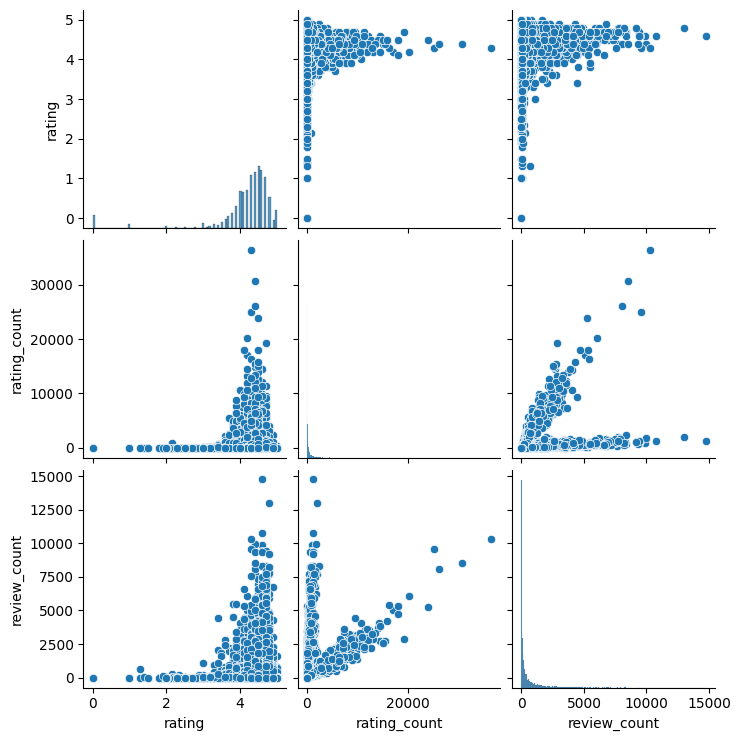

In [60]:
#Creating a pairplot for already numeric columns in dataframe
import seaborn as sns
pairplot_cols: list[str] = [
    "price_range_id",
    "rating",
    "rating_count",
    "review_count",
    "daily_reservation_count",
]
data = df[pairplot_cols]
sns.pairplot(data)

In [61]:
data['price_range_id'] = data['price_range_id'].astype(float)
data['rating'] = data['rating'].astype(float)
data['rating_count'] = data['rating_count'].astype(float)
data['review_count'] = data['review_count'].astype(float)
data['daily_reservation_count'] = data['daily_reservation_count'].astype(float)

In [62]:
#Dropping the unencoded column and concatenating the numerical and categorical columns
df_cat_cols.drop('categories',axis=1, inplace = True)
df_corr = pd.concat([df_cat_cols, data], axis=1, join='inner')
df_corr.head()

country  subregion  brand_name  area  public_transit  primary_cuisine  \
0        0          0        8831   204            1142              161   
1        0          0        7227   472            1142                3   
2        0          0       14935   372            1142              148   
3        0          0        6267   372            1142               34   
4        0          0        3024    55            1142               90   

   dining_style  parking_info  executive_chef_name  dress_code  entertainment  \
0             0             4                 3079           1            843   
1             0             1                 3079           0            843   
2             0             1                 3079           0            843   
3             0             1                 3079           0            843   
4             0             2                 2689           1            843   

   price_range  payment_options  tags  review_topics  safety_precautions  \
0            0               37  7207           3288                 992   
1            0               62  7392           3412                 992   
2            0               62  7392           3412                 992   
3            0               62  7392           3412                 992   
4            0               37  6656           2505                 496   

   price_range_id  rating  rating_count  review_count  daily_reservation_count  
0             2.0     4.6         136.0          18.0                      NaN  
1             2.0     0.0           0.0           0.0                      NaN  
2             2.0     1.9           3.0           1.0                      NaN  
3             2.0     0.0           0.0           0.0                      NaN  
4             2.0     4.7          83.0         692.0                      1.0

In [63]:
#Checking the Pearson's correlation coefficient for our correlation matrix dataframe
corr_matrix = df_corr.corr().abs()
corr_matrix

country  subregion  brand_name      area  \
country                      NaN        NaN         NaN       NaN   
subregion                    NaN        NaN         NaN       NaN   
brand_name                   NaN        NaN    1.000000  0.016377   
area                         NaN        NaN    0.016377  1.000000   
public_transit               NaN        NaN    0.004263  0.005129   
primary_cuisine              NaN        NaN    0.052985  0.006935   
dining_style                 NaN        NaN    0.012514  0.023332   
parking_info                 NaN        NaN    0.018557  0.013622   
executive_chef_name          NaN        NaN    0.008925  0.001135   
dress_code                   NaN        NaN    0.003571  0.014967   
entertainment                NaN        NaN    0.006145  0.002907   
price_range                  NaN        NaN    0.015419  0.011750   
payment_options              NaN        NaN    0.006154  0.015720   
tags                         NaN        NaN    0.007855  0.010362   
review_topics                NaN        NaN    0.004930  0.004851   
safety_precautions           NaN        NaN    0.005099  0.019987   
price_range_id               NaN        NaN    0.015419  0.011750   
rating                       NaN        NaN    0.017429  0.005050   
rating_count                 NaN        NaN    0.015116  0.003508   
review_count                 NaN        NaN    0.007279  0.023694   
daily_reservation_count      NaN        NaN    0.014844  0.035056   

                         public_transit  primary_cuisine  dining_style  \
country                             NaN              NaN           NaN   
subregion                           NaN              NaN           NaN   
brand_name                     0.004263         0.052985      0.012514   
area                           0.005129         0.006935      0.023332   
public_transit                 1.000000         0.001133      0.101542   
primary_cuisine                0.001133         1.000000      0.050409   
dining_style                   0.101542         0.050409      1.000000   
parking_info                   0.179664         0.034333      0.338496   
executive_chef_name            0.105065         0.022180      0.201604   
dress_code                     0.116091         0.017956      0.332425   
entertainment                  0.009596         0.000266      0.087324   
price_range                    0.134913         0.021665      0.432451   
payment_options                0.170044         0.037952      0.395207   
tags                           0.148711         0.005208      0.409209   
review_topics                  0.126886         0.008379      0.162182   
safety_precautions             0.142388         0.026884      0.200780   
price_range_id                 0.134913         0.021665      0.432451   
rating                         0.081644         0.036359      0.158670   
rating_count                   0.001363         0.011221      0.122298   
review_count                   0.014850         0.047998      0.274951   
daily_reservation_count        0.047144         0.049656      0.147803   

                         parking_info  executive_chef_name  dress_code  \
country                           NaN                  NaN         NaN   
subregion                         NaN                  NaN         NaN   
brand_name                   0.018557             0.008925    0.003571   
area                         0.013622             0.001135    0.014967   
public_transit               0.179664             0.105065    0.116091   
primary_cuisine              0.034333             0.022180    0.017956   
dining_style                 0.338496             0.201604    0.332425   
parking_info                 1.000000             0.283066    0.375229   
executive_chef_name          0.283066             1.000000    0.219643   
dress_code                   0.375229             0.219643    1.000000   
entertainment                0.095931             0.066380    0

In [64]:
sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)).stack().sort_values(ascending=False))


In [65]:
#Printing out highly correlated columns
for index, value in sol.items():
    if value >= 0.75:
        print(f"{index} is a highly Redundant Pair and their pearson's correlation is {value}")

('price_range', 'price_range_id') is a highly Redundant Pair and their pearson's correlation is 1.0


As a lot of pairs have a correlation of 0.77, the thresold I chose was 0.75; that might have been irrelevant if we chose to focus on feature selection. 
Price_range_id has to be removed, obviously. 

In [66]:
# ✏️ YOUR CODE HERE - may require encoding categorical string variables

---

Good job!

<img src="https://media.giphy.com/media/qLhxN7Rp3PI8E/giphy.gif" height="250px" width="250px" alt="legend of zelda">